In [1]:
from classes import CsvLoader
from pathlib import Path
import pandas as pd
import plotly.graph_objects as go
from plotly.data import tips
import numpy as np
from pathlib import Path

# Docs to multiple Axes which I used on -> https://plotly.com/python/multiple-axes/

## Initialize the CsvLoader

In [2]:
loader = CsvLoader()
files = loader.get_csv_files()

## Cleaning Files

In [3]:
# Cleaning files in data subdirectory
# Do it only once!
for file in files:
    loader.clean_csv(file)

files = loader.get_csv_files()

Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv data completed!
Cleaning csv d

## Save all plots

In [4]:


for file in files:
    df = pd.read_csv(file)

    fig = go.Figure(
        data=go.Bar(
            x=df["Durchmesser"],
            y=df["q"],
            name="Incremental Volume",
            marker=dict(color="blue"),
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=df["Durchmesser"],
            y=df["Q"],
            yaxis="y2",
            name="Cumulative Volume",
            marker=dict(color="red"),
            mode="lines+markers"
        )
    )
    
    fig.update_layout(
        title_text="Partikelgrößenverteilung",
        legend=dict(orientation="h", 
                    yanchor="top",
                    y=-0.2,
                    xanchor="center",
                    x=0.5),         
        xaxis=dict(
            title=dict(text="Particle size (µm)"),
            type="log", # Wichtig: X-Achse auf logarithmische Skala setzen
            autorange=True,
            showgrid=True, # Optional: Gitterlinien anzeigen
            mirror=True,
            linewidth=1, # Optional: Achsenlinienbreite
            linecolor='black', # Optional: Achsenlinienfarbe
            ticks='outside',
            ticklen=5,
            tickwidth=1, # Optional: Tick-Breite
        ),
        yaxis=dict(
            title=dict(text="Incremental volume (%)"),
            side="left",
            range=[0, 10],
            showgrid=True,
            mirror=True,
            linewidth=1,
            linecolor='black',
            ticks='outside',
            ticklen=5,
            tickwidth=1,
        ),
        yaxis2=dict(
            title=dict(text="Cumulative Volume %"),
            side="right",
            range=[0, 100],
            overlaying="y",
            tickmode="array",
            tickvals=[0, 20, 40, 60, 80, 100], # Explizite Tick-Werte für rechte Achse
            showgrid=True,
            mirror=True,
            linewidth=1,
            linecolor='black',
            ticks='outside',
            ticklen=5,
            tickwidth=1,
        ),
        bargap=0, # Optional: Abstand zwischen Balken entfernen, damit sie direkt aneinander liegen
        plot_bgcolor='white' # Optional: Plot-Hintergrund weiß setzen
    )
    
    fig.write_image(str(Path.cwd().joinpath("images", file.stem)) + ".png")


## Show Plot

0 type for: 2557019_EtOH.txt
1 type for: 2557010_EtOH.txt
2 type for: 2557015_NK_EtOH.txt
3 type for: 2557014_EtOH.txt
4 type for: 2557027_RB_1h_EtOH.txt
5 type for: 2557026_RB_1h_EtOH.txt
6 type for: 2557028_RB1_30h_EtOH_1.txt
7 type for: 2557012_EtOH.txt
8 type for: 2557024_EtOH_3_RB1_30h.txt
9 type for: 2557015_EtOH.txt
10 type for: 2557024_EtOH_2.txt
11 type for: 2557007.txt
12 type for: 2557025(Us-bad 10 min, 24h eingelegt).txt
13 type for: 2557028_RB1_40h_EtOH_1.txt
14 type for: 2557002_EtOH.txt
15 type for: 2557026_EtOH.txt
16 type for: 2557025.txt
17 type for: 2557019_2.txt
18 type for: 2557021_EtOH.txt
19 type for: 2557018_NK_EtOH.txt
20 type for: 2557025_RB_1h_EtOH.txt
21 type for: 2557022_EtOH.txt
22 type for: 2557017_NK_EtOH.txt
23 type for: 2557028_RB1_30h_EtOH_2.txt
24 type for: 2557020.txt
25 type for: 2557025(Us-bad 13 min, 2T_Dispex AA4040).txt
26 type for: 2557022_2(längere Wartezeit, länger Us).txt
27 type for: 2557008_EtOH.txt
28 type for: 2557029_RB1_30h_EtOH.txt
2

Input:  32


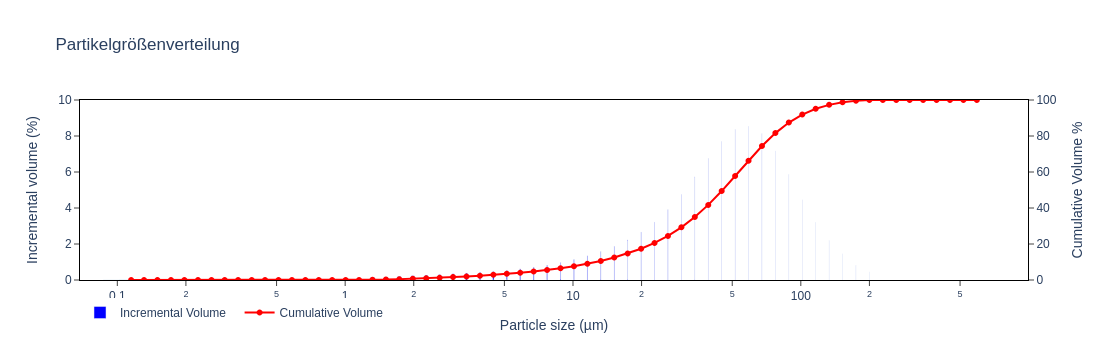

In [16]:
# Dokumentation zu mehrfachen Axen auf -> https://plotly.com/python/multiple-axes/

# Follow the instructions via the text input field!
df = loader.get_csv_file()

# The Plotting
try:
    
    # Berechnung der Balkenbreite für logarithmische X-Achse
    log_diameters = np.log10(df["Durchmesser"])
    widths = np.diff(log_diameters)
    # Füge einen Wert für den letzten Punkt hinzu
    widths = np.append(widths, widths[-1])
    
    fig = go.Figure(
        data=go.Bar(
            x=df["Durchmesser"],
            y=df["q"],
            name="Incremental Volume",
            marker=dict(color="blue"),
            width=widths
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=df["Durchmesser"],
            y=df["Q"],
            yaxis="y2",
            name="Cumulative Volume",
            marker=dict(color="red"),
            mode="lines+markers"
        )
    )
    
    fig.update_layout(
        title_text="Partikelgrößenverteilung",
        legend=dict(orientation="h"),         
        xaxis=dict(
            title=dict(text="Particle size (µm)"),
            type="log", # Wichtig: X-Achse auf logarithmische Skala setzen
            autorange=True,
            showgrid=True, # Optional: Gitterlinien anzeigen
            mirror=True,
            linewidth=1, # Optional: Achsenlinienbreite
            linecolor='black', # Optional: Achsenlinienfarbe
            ticks='outside',
            ticklen=5,
            tickwidth=1, # Optional: Tick-Breite
        ),
        yaxis=dict(
            title=dict(text="Incremental volume (%)"),
            side="left",
            range=[0, 10],
            showgrid=True,
            mirror=True,
            linewidth=1,
            linecolor='black',
            ticks='outside',
            ticklen=5,
            tickwidth=1,
        ),
        yaxis2=dict(
            title=dict(text="Cumulative Volume %"),
            side="right",
            range=[0, 100],
            overlaying="y",
            tickmode="array",
            tickvals=[0, 20, 40, 60, 80, 100], # Explizite Tick-Werte für rechte Achse
            showgrid=True,
            mirror=True,
            linewidth=1,
            linecolor='black',
            ticks='outside',
            ticklen=5,
            tickwidth=1,
        ),
        bargap=0, # Optional: Abstand zwischen Balken entfernen, damit sie direkt aneinander liegen
        plot_bgcolor='white' # Optional: Plot-Hintergrund weiß setzen
    )
    fig.show()
    
except TypeError:
    print("\nProgram interrupted by user.")

0 type for: 2557019_EtOH.txt
1 type for: 2557010_EtOH.txt
2 type for: 2557015_NK_EtOH.txt
3 type for: 2557014_EtOH.txt
4 type for: 2557027_RB_1h_EtOH.txt
5 type for: 2557026_RB_1h_EtOH.txt
6 type for: 2557028_RB1_30h_EtOH_1.txt
7 type for: 2557012_EtOH.txt
8 type for: 2557024_EtOH_3_RB1_30h.txt
9 type for: 2557015_EtOH.txt
10 type for: 2557024_EtOH_2.txt
11 type for: 2557007.txt
12 type for: 2557025(Us-bad 10 min, 24h eingelegt).txt
13 type for: 2557028_RB1_40h_EtOH_1.txt
14 type for: 2557002_EtOH.txt
15 type for: 2557026_EtOH.txt
16 type for: 2557025.txt
17 type for: 2557019_2.txt
18 type for: 2557021_EtOH.txt
19 type for: 2557018_NK_EtOH.txt
20 type for: 2557025_RB_1h_EtOH.txt
21 type for: 2557022_EtOH.txt
22 type for: 2557017_NK_EtOH.txt
23 type for: 2557028_RB1_30h_EtOH_2.txt
24 type for: 2557020.txt
25 type for: 2557025(Us-bad 13 min, 2T_Dispex AA4040).txt
26 type for: 2557022_2(längere Wartezeit, länger Us).txt
27 type for: 2557008_EtOH.txt
28 type for: 2557029_RB1_30h_EtOH.txt
2

Input:  40


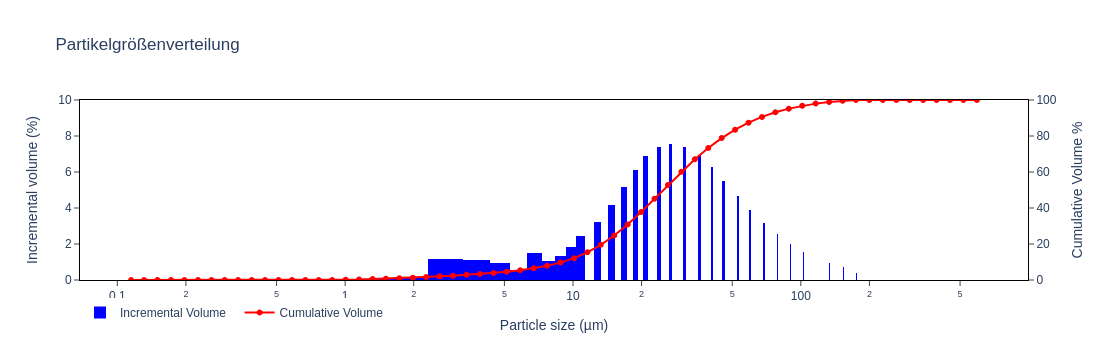

In [3]:
# Dokumentation zu mehrfachen Axen auf -> https://plotly.com/python/multiple-axes/

# Follow the instructions via the text input field!
df = loader.get_csv_file()

# The Plotting
try:
    
    # Berechnung der Bin-Kanten für das Histogramm
    # Für logarithmische Achsen nimmt man oft das geometrische Mittel zwischen benachbarten Punkten.
    # Das erste Element ist der Anfang des ersten Bins, das letzte Element ist das Ende des letzten Bins.
    bin_edges = np.sqrt(df["Durchmesser"].iloc[:-1].values * df["Durchmesser"].iloc[1:].values)
    
    # Füge den Startpunkt des ersten Bins und den Endpunkt des letzten Bins hinzu.
    # Annahme: Der erste Punkt ist der Start des ersten Bins und der letzte Punkt ist der Endpunkt des letzten Bins.
    # Alternativ könnte man auch den ersten Durchmesser / (Verhältnis des 2. zum 1.) und den letzten * (Verhältnis des letzten zum vorletzten) nehmen.
    # Für dieses Dataset reicht es, wenn wir einfach den ersten und den letzten Durchmesser hinzufügen.
    bin_edges = np.insert(bin_edges, 0, df["Durchmesser"].iloc[0])
    bin_edges = np.append(bin_edges, df["Durchmesser"].iloc[-1])

    fig = go.Figure()
    
    # Hinzufügen des Histogramm-Traces
    fig.add_trace(
        go.Histogram(
            x=df["Durchmesser"],
            y=df["q"],
            name="Incremental Volume",
            marker_color="blue", # Farbe direkt für den Marker setzen
            histfunc="sum", # Summiert die y-Werte innerhalb jedes Bins
            xbins=dict(
                start=bin_edges[0],
                end=bin_edges[-1],
                size=np.diff(np.log10(bin_edges)) # Bin-Größen auf logarithmischer Skala
            ),
            autobinx=False, # Deaktiviere automatische Bin-Erkennung
            # Alternativ: Um die Breite der Balken manuell zu steuern (nicht unbedingt nötig mit xbins)
            # hoverinfo='x+y', # Optional: Zeigt x- und y-Wert beim Hovern an
            # opacity=0.8 # Optional: Für Transparenz
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=df["Durchmesser"],
            y=df["Q"],
            yaxis="y2",
            name="Cumulative Volume",
            marker=dict(color="red"),
            mode="lines+markers"
        )
    )
    
    fig.update_layout(
        title_text="Partikelgrößenverteilung",
        legend=dict(orientation="h"),         
        xaxis=dict(
            title=dict(text="Particle size (µm)"),
            type="log", # Wichtig: X-Achse auf logarithmische Skala setzen
            autorange=True,
            showgrid=True, # Optional: Gitterlinien anzeigen
            mirror=True,
            linewidth=1, # Optional: Achsenlinienbreite
            linecolor='black', # Optional: Achsenlinienfarbe
            ticks='outside',
            ticklen=5,
            tickwidth=1, # Optional: Tick-Breite
        ),
        yaxis=dict(
            title=dict(text="Incremental volume (%)"),
            side="left",
            range=[0, 10],
            showgrid=True,
            mirror=True,
            linewidth=1,
            linecolor='black',
            ticks='outside',
            ticklen=5,
            tickwidth=1,
        ),
        yaxis2=dict(
            title=dict(text="Cumulative Volume %"),
            side="right",
            range=[0, 100],
            overlaying="y",
            tickmode="array",
            tickvals=[0, 20, 40, 60, 80, 100], # Explizite Tick-Werte für rechte Achse
            showgrid=True,
            mirror=True,
            linewidth=1,
            linecolor='black',
            ticks='outside',
            ticklen=5,
            tickwidth=1,
        ),
        bargap=0, 
        plot_bgcolor='white',
        barmode='overlay' # Stellt sicher, dass die Balken nicht gestapelt werden, falls mehrere Histogramme vorhanden wären
    )
    fig.show()
    
except TypeError:
    print("\nProgram interrupted by user.")